<a href="https://colab.research.google.com/github/skdding3/CSAI_assignment/blob/main/N234_sunki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install shap
!pip install PDPbox
!pip install category_encoders

In [ ]:
import pandas as pd

df = pd.read_csv('/content/Pokemon.csv')   #pokemon stats data

df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
df['Double type'] = df['Type 2'].notnull()          #일단 속성(Type)을 두개이상 가지고 있는 더블타입을 분류
df['Combination type'] = df['Type 1'] + '/' + df['Type 2']           #두가지 타입을 가지고 있는 포켓몬에 대한 타입분류 피쳐 생성
df['Combination type'].fillna(df['Type 1'], inplace=True)            #한가지 타입을 가지고 있는 포켓몬은 하나만 표기

df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Double type,Combination type
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,True,Grass/Poison
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,True,Grass/Poison
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,True,Grass/Poison
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,True,Grass/Poison
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,False,Fire


In [ ]:
target = df['Combination type']

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
numerical =  pd.DataFrame(sc.fit_transform
                          (df[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def','Speed']]),
       columns=['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def','Speed'],
       index= df.index
        )

In [ ]:
target.value_counts(normalize=True)

Normal           0.07625
Water            0.07375
Psychic          0.04750
Grass            0.04125
Fire             0.03500
                  ...   
Normal/Water     0.00125
Rock/Fighting    0.00125
Psychic/Dark     0.00125
Steel/Dragon     0.00125
Water/Steel      0.00125
Name: Combination type, Length: 154, dtype: float64

In [ ]:
### (제출폼 과제) 이곳에서 과제를 진행해 주세요 ###
import sklearn
import xgboost
import shap
from sklearn.model_selection import train_test_split

shap.initjs();

df, target = shap.datasets.boston()
X_train,X_test,y_train,y_test = train_test_split(df, target, test_size=0.2, random_state=2)

model = xgboost.XGBRegressor().fit(X_train, y_train)

### Draw PDP plots ###


[05:39:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


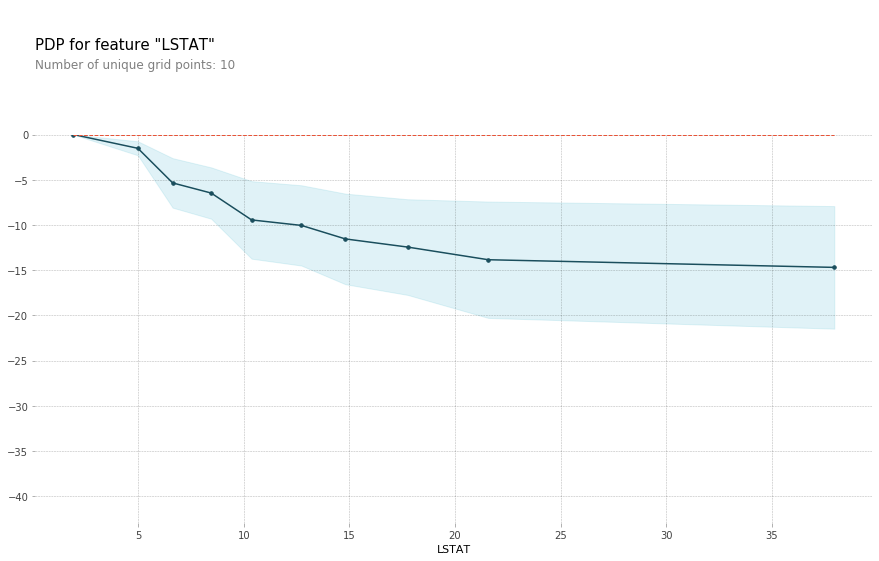

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'LSTAT'


isolated = pdp_isolate(
    model=model, 
    dataset=X_train, 
    model_features=X_train.columns, 
    feature=feature,
    grid_type='percentile', 
    num_grid_points=10 
)
pdp_plot(isolated, feature_name=feature);

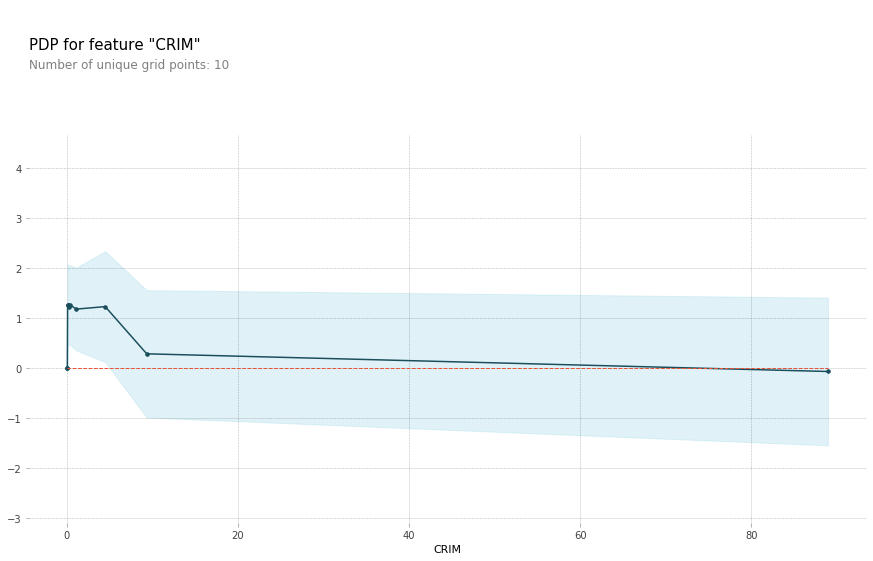

In [ ]:
feature = 'CRIM'
isolated = pdp_isolate(
    model=model, 
    dataset=X_train, 
    model_features=X_train.columns, 
    feature=feature,
    grid_type='percentile',
    num_grid_points=10 
)
pdp_plot(isolated, feature_name=feature);

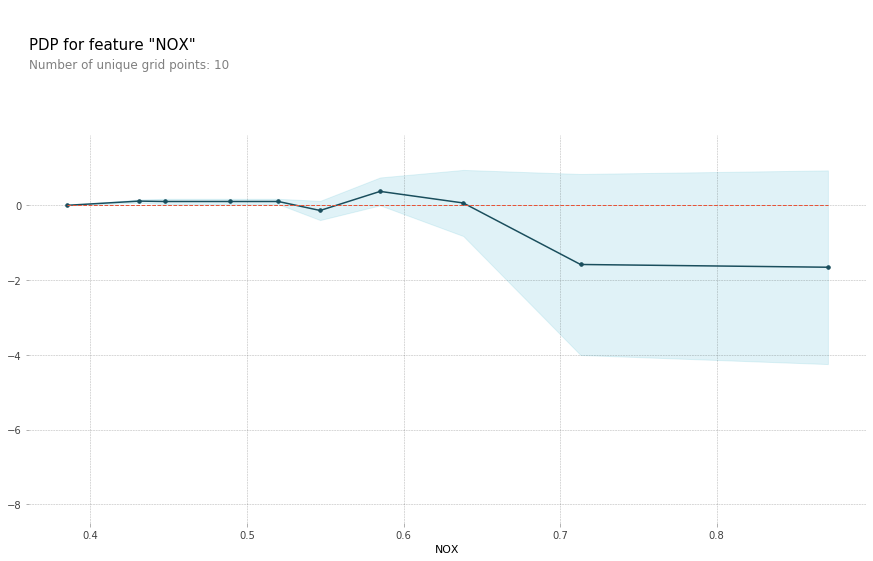

In [ ]:
feature = 'NOX'
isolated = pdp_isolate(
    model=model, 
    dataset=X_train, 
    model_features=X_train.columns, 
    feature=feature,
    grid_type='percentile', 
    num_grid_points=10 
)
pdp_plot(isolated, feature_name=feature);

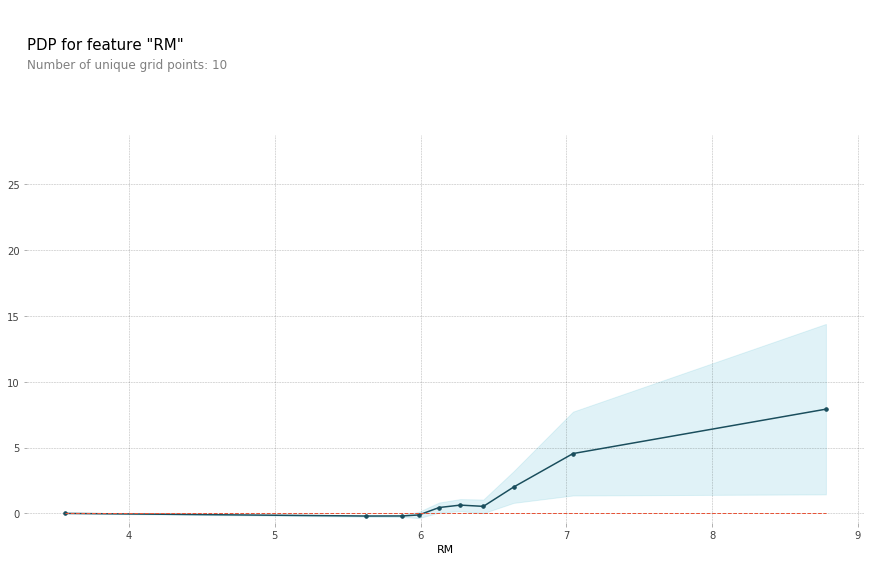

In [ ]:
feature = 'RM'
isolated = pdp_isolate(
    model=model, 
    dataset=X_train, 
    model_features=X_train.columns, 
    feature=feature,
    grid_type='percentile', 
    num_grid_points=10 
)
pdp_plot(isolated, feature_name=feature);

### 2) 

In [ ]:
### 이곳에서 과제를 진행해 주세요 ###

In [ ]:
### (제출폼 과제) 이곳에서 과제를 진행해 주세요 ###
explainer = shap.TreeExplainer(model)

row = X_test.iloc[[0]]
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=row
)
### Draw SHAP plots ###

In [ ]:
shap.initjs()
shap_values = explainer.shap_values(X_test.iloc[:100])
shap.force_plot(explainer.expected_value, shap_values, X_test.iloc[:100])

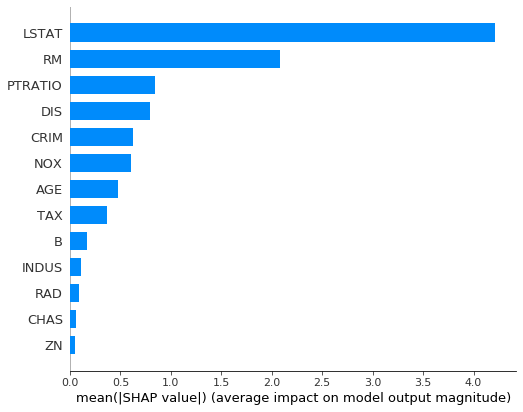

In [ ]:
shap.initjs()
shap.summary_plot(shap_values, X_train.iloc[:300], plot_type="bar")

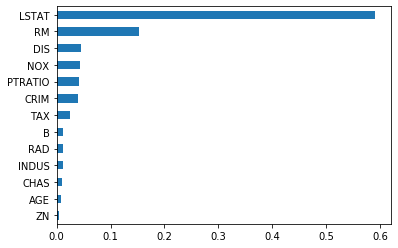

In [ ]:
import pandas as pd

importance = pd.Series(model.feature_importances_, X_train.columns)
importance.sort_values(ascending = True).plot.barh()